# Exploratory Data Analysis 

In [18]:
import polars as pl

import plotly.express as px
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
# Path needs to be added manually to read from another folder
path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, 'utils')))
if (not (path2add in sys.path)) :
    sys.path.append(path2add)

import visualization

In [19]:
df = pl.read_csv("..\data\cleaned_df.csv")
print("Shape : ", df.shape)
df.head(5)

Shape :  (1695, 13)


,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification,target
i64,str,f64,f64,f64,i64,str,f64,f64,f64,str,str,i64
0,"""1f2c32d8-2d6e-…",0.000812,0.004066,85.643243,5405,"""default""",1460.0,1295.0,451.0,"""E""","""normal""",0
1,"""4c486414-d4f5-…",0.000063,0.002211,16.166805,519,"""default""",9299.0,8447.0,302.0,"""E""","""normal""",0
2,"""7e5838fc-bce1-…",0.004481,0.015324,99.573276,6211,"""default""",255.0,232.0,354.0,"""E""","""normal""",0
3,"""82661ecd-d87f-…",0.017837,0.014974,69.792793,8292,"""default""",195.0,111.0,116.0,"""E""","""normal""",0
4,"""d62d56ea-775e-…",0.000797,0.006056,14.952756,182,"""default""",272.0,254.0,23.0,"""E""","""normal""",0


In [20]:
visualization.bar_plot(df,"target","Counts of Target Classes")

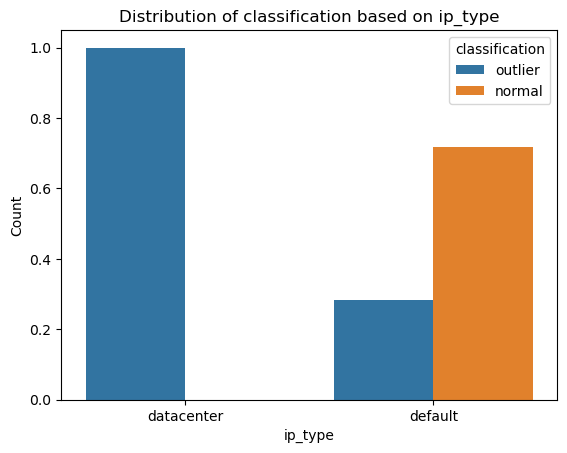

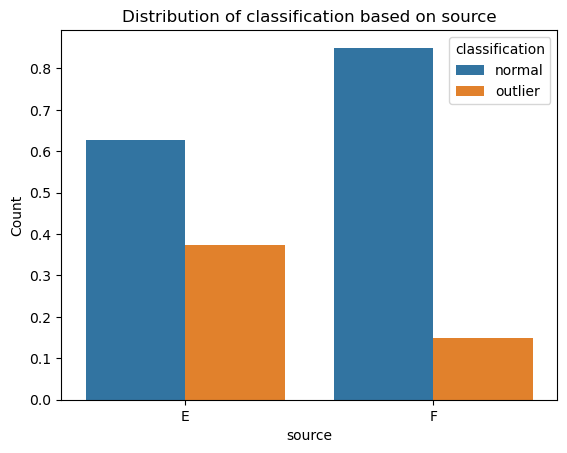

In [21]:
categorical_cols=["ip_type","source"]
for col in categorical_cols:
    visualization.plt_proportion_plot(
        df,
        col,
        "classification"
    )


**Observation**
* Every API call from datacenter is an outlier
* source is more fairly distributed

**Impact** 

* Every API call from ip_type : datacenter can be dropped.


In [22]:
df

,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification,target
i64,str,f64,f64,f64,i64,str,f64,f64,f64,str,str,i64
0,"""1f2c32d8-2d6e-…",0.000812,0.004066,85.643243,5405,"""default""",1460.0,1295.0,451.0,"""E""","""normal""",0
1,"""4c486414-d4f5-…",0.000063,0.002211,16.166805,519,"""default""",9299.0,8447.0,302.0,"""E""","""normal""",0
2,"""7e5838fc-bce1-…",0.004481,0.015324,99.573276,6211,"""default""",255.0,232.0,354.0,"""E""","""normal""",0
3,"""82661ecd-d87f-…",0.017837,0.014974,69.792793,8292,"""default""",195.0,111.0,116.0,"""E""","""normal""",0
4,"""d62d56ea-775e-…",0.000797,0.006056,14.952756,182,"""default""",272.0,254.0,23.0,"""E""","""normal""",0
…,…,…,…,…,…,…,…,…,…,…,…,…
1690,"""3653d165-4b93-…",45.603433,0.8,15.0,41044,"""datacenter""",2.0,1.0,12.0,"""F""","""outlier""",1
1691,"""44356d09-52e9-…",852.92925,0.5,2.0,102352,"""datacenter""",2.0,1.0,1.0,"""F""","""outlier""",1
1692,"""0ecdc692-df55-…",59.243,0.8,5.0,17773,"""datacenter""",3.0,1.0,4.0,"""F""","""outlier""",1


<Axes: >

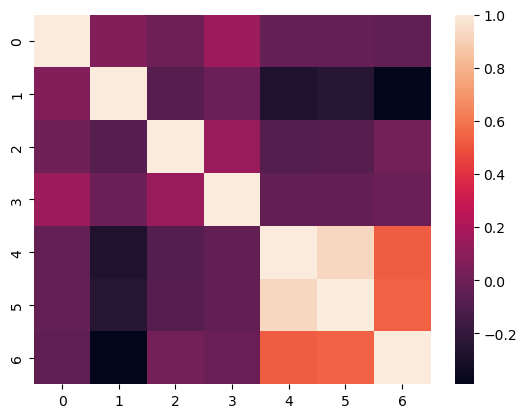

In [23]:
numerical_cols = [
    "inter_api_access_duration(sec)",
    "api_access_uniqueness",
    "sequence_length(count)",
    "vsession_duration(min)",
    "num_sessions",
    "num_users",
    "num_unique_apis",
    ]
sns.heatmap(df[numerical_cols].corr())

In [24]:
df[numerical_cols].to_pandas()

ModuleNotFoundError: pa.Table requires 'pyarrow' module to be installed

In [9]:
df[numerical_cols].corr().pivot(index="Model", columns="Task", values="Score")


ColumnNotFoundError: Model

In [11]:
sns.load_dataset("glue")

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


In [10]:
sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")


Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1
